In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

The FixOurFood Dashboard utilizes food supply data from FAOSTAT to describe dietary patterns and estimate their impact and the impact of interventions on multiple indicators derived from it.
Latest FAOSTAT data can be downloaded from the FAO website:
- https://www.fao.org/faostat/en/#data/FBSH for data released until 2013 utilizing old methodology
- https://www.fao.org/faostat/en/#data/FBS for data published since 2014 utilizing new methodology

The raw datasets are obtained directly from both sites using the following filtering:

- Countries: United Kingdom of Great Britain and Northern Ireland
- Elements: Food, Food supply, Food supply quantity, Fat supply quantity, Protein supply quantity 
- Items: Select all except *Population*
- Years: Select all for FBSH and 2014-2019 for FBS 

This will create 2 CSV files which we rename
`FAOSTAT_food_data_UK_1961_2013.csv`
`FAOSTAT_food_data_UK_2014_2019.csv`


The FixOurFood dashboard presents dietary patterns and emissions estimated from food supply reported from FAO.
Values for the UK are used here.
    In this notebook, the values are extracted and stored in an easy to manage numpy file which is then read by the main dashboard script.
    

In [2]:
fbs_csv_1 = 'data/food/FAOSTAT_food_data_UK_1961_2013.csv'
fbs_csv_2 = 'data/food/FAOSTAT_food_data_UK_2014_2019.csv'

In [3]:
fbs_1 = pd.read_csv(fbs_csv_1)
fbs_2 = pd.read_csv(fbs_csv_2)

fbs = pd.concat([fbs_1, fbs_2], ignore_index=True, sort=False)
fbs = fbs[['Element', 'Element Code', 'Item', 'Item Code', 'Year', 'Value']]
years = np.unique(fbs['Year'])

In [4]:
# We'll rename some of the items due to changes in naming convention
fbs.loc[fbs['Item Code'] == 2805, 'Item'] = "Rice and Products"
fbs.loc[fbs['Item Code'] == 2807, 'Item Code'] = 2805

fbs.loc[fbs['Item Code'] == 2552, 'Item'] = "Groundnuts (Shelled Eq)"
fbs.loc[fbs['Item Code'] == 2552, 'Item Code'] = 2556

# Also, will remove the 'Miscellaneous' item as it has incomplete data
fbs.drop(fbs.loc[fbs['Item Code'] == 2899].index, inplace=True)
fbs

,Element,Element Code,Item,Item Code,Year,Value
0,Total Population - Both sexes,511,Population,2501,1961,53054.00
1,Total Population - Both sexes,511,Population,2501,1962,53425.00
2,Total Population - Both sexes,511,Population,2501,1963,53802.00
3,Total Population - Both sexes,511,Population,2501,1964,54170.00
4,Total Population - Both sexes,511,Population,2501,1965,54516.00
...,...,...,...,...,...,...
23721,Fat supply quantity (g/capita/day),684,Infant food,2680,2015,0.10
23722,Fat supply quantity (g/capita/day),684,Infant food,2680,2016,0.10
23723,Fat supply quantity (g/capita/day),684,Infant food,2680,2017,0.08
23724,Fat supply quantity (g/capita/day),684,Infant food,2680,2018,0.05


Food items are identified by the `"Item Code"` column.

In [5]:
item_names = []
item_codes = np.unique(fbs['Item Code'])
for code in item_codes:
    item_names.append(fbs[fbs['Item Code'] == code]['Item'].iloc[0])
    print(code, item_names[-1])

2501 Population
2511 Wheat and products
2513 Barley and products
2514 Maize and products
2515 Rye and products
2516 Oats
2520 Cereals, Other
2531 Potatoes and products
2534 Roots, Other
2535 Yams
2542 Sugar (Raw Equivalent)
2543 Sweeteners, Other
2546 Beans
2547 Peas
2549 Pulses, Other and products
2551 Nuts and products
2555 Soyabeans
2556 Groundnuts (Shelled Eq)
2558 Rape and Mustardseed
2560 Coconuts - Incl Copra
2561 Sesame seed
2563 Olives (including preserved)
2570 Oilcrops, Other
2571 Soyabean Oil
2572 Groundnut Oil
2573 Sunflowerseed Oil
2574 Rape and Mustard Oil
2575 Cottonseed Oil
2576 Palmkernel Oil
2577 Palm Oil
2578 Coconut Oil
2579 Sesameseed Oil
2580 Olive Oil
2582 Maize Germ Oil
2586 Oilcrops Oil, Other
2601 Tomatoes and products
2602 Onions
2605 Vegetables, other
2611 Oranges, Mandarines
2612 Lemons, Limes and products
2613 Grapefruit and products
2614 Citrus, Other
2615 Bananas
2616 Plantains
2617 Apples and products
2618 Pineapples and products
2619 Dates
2620 Grapes

Different information and values are encoded by the `"Element code"`:

In [6]:
element_names = []
element_codes = np.unique(fbs['Element Code'])
for code in element_codes:
    element_names.append(fbs[fbs['Element Code'] == code]['Element'].iloc[0])
    print(code, element_names[-1])

511 Total Population - Both sexes
645 Food supply quantity (kg/capita/yr)
664 Food supply (kcal/capita/day)
674 Protein supply quantity (g/capita/day)
684 Fat supply quantity (g/capita/day)
5142 Food


We can plot, for instance, the Bovine meat supply (`Element Code == 5142`, `Item Code == 2731`) fpr the whole year period

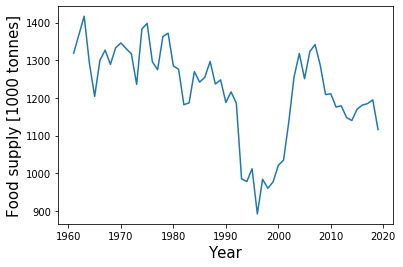

In [7]:
beef_supply = fbs[(fbs['Item Code'] == 2731) & (fbs['Element Code'] == 5142)]['Value']

plt.plot(years, beef_supply)
plt.xlabel('Year', size=15)
plt.ylabel('Food supply [1000 tonnes]', size=15);


# Fixing incomplete data

Checking for incomplete data shows that several Items have been renamed between the two year ranges, and some items without certain nutrients are ommited.
We will fix that to have a consistent array.

In [8]:
# We check which items have no information on protein or fat contents and fill in with zero values

for j, ecode in enumerate(element_codes[3:5]):
    food = fbs[fbs['Element Code'] == ecode]
    for i, icode in enumerate(item_codes):
        if food[food['Item Code'] == icode].shape[0] == 6:
            print(ecode, icode, item_names[i],f' does not have {element_names[j+3]} for 1961-2013 range')
        elif food[food['Item Code'] == icode].shape[0] == 53:
            print(ecode, icode, item_names[i],f' does not have {element_names[j+3]} for 2014-2019 range')


674 2542 Sugar (Raw Equivalent)  does not have Protein supply quantity (g/capita/day) for 1961-2013 range
674 2571 Soyabean Oil  does not have Protein supply quantity (g/capita/day) for 1961-2013 range
674 2572 Groundnut Oil  does not have Protein supply quantity (g/capita/day) for 1961-2013 range
674 2573 Sunflowerseed Oil  does not have Protein supply quantity (g/capita/day) for 1961-2013 range
674 2574 Rape and Mustard Oil  does not have Protein supply quantity (g/capita/day) for 1961-2013 range
674 2575 Cottonseed Oil  does not have Protein supply quantity (g/capita/day) for 1961-2013 range
674 2576 Palmkernel Oil  does not have Protein supply quantity (g/capita/day) for 1961-2013 range
674 2577 Palm Oil  does not have Protein supply quantity (g/capita/day) for 1961-2013 range
674 2578 Coconut Oil  does not have Protein supply quantity (g/capita/day) for 1961-2013 range
674 2579 Sesameseed Oil  does not have Protein supply quantity (g/capita/day) for 1961-2013 range
674 2580 Olive 

In [9]:
# We check which items (Except population, 2501) have no information on protein or fat contents and fill in with zero values

for year in years:
    for j, ecode in enumerate(element_codes[3:5]):
        for i, icode in enumerate(item_codes):
            if icode != 2501 and fbs[(fbs['Year'] == year) & (fbs["Element Code"] == ecode) & (fbs["Item Code"] == icode)].empty:
                newrow = {'Element':element_names[j+3],
                          'Element Code':ecode,
                          'Item':item_names[i],
                          'Item Code':icode,
                          'Year':year,
                          'Value':0,}
                fbs=fbs.append(newrow, ignore_index=True)

# Check that the last element is of the 'Fat supply for Honey' type
fbs.iloc[-1]

Element         Fat supply quantity (g/capita/day)
Element Code                                   684
Item                                         Honey
Item Code                                     2745
Year                                          2013
Value                                            0
Name: 24838, dtype: object

# Food supply quantity per UN capita

We will add an Element to quantify the food supply per capita per day

- Food supply quantity UN population (kg/capita/day)

which will simplify the computations of emissions in the dashboard.
We will assign it a generic code `"Element Code == 10004"` for future identification
To calculate it we will divide the total Food supply by the region population, multiply by the number of days on a year and number of kilograms on 1000 tonnes 


In [10]:
# Add new element to lists
fbq_un_pop_name = 'Food supply quantity UN population (kg/capita/day)'
element_names = np.append(element_names, fbq_un_pop_name)
element_codes = np.append(element_codes, 10004)

# We copy an element and redefine its element code and name
fsq_un_pop = fbs[(fbs['Element Code']==5142)]
kwargs = {'Element Code':10004, 'Element':fbq_un_pop_name}
fsq_un_pop = fsq_un_pop.assign(**kwargs)

In [11]:
# Append food supply per UN capita
population = fbs[fbs['Item Code'] == 2501]['Value'].values

for icode in item_codes[1:]:
    f = fsq_un_pop[fsq_un_pop['Item Code'] == icode]['Value']
    fsq_un_pop.loc[fsq_un_pop['Item Code'] == icode, 'Value'] = f * 1e6 / 365 / population / 1e3
    
fbs = fbs.append(fsq_un_pop, ignore_index=True)

In [12]:
# Final check, do all element codes have the same dimensions?
for code, codename in zip(element_codes, element_names):
    f_un_pop = fbs[fbs['Element Code'] == code]
    print(f_un_pop.shape,code,codename)

(59, 6) 511 Total Population - Both sexes
(4956, 6) 645 Food supply quantity (kg/capita/yr)
(4956, 6) 664 Food supply (kcal/capita/day)
(4956, 6) 674 Protein supply quantity (g/capita/day)
(4956, 6) 684 Fat supply quantity (g/capita/day)
(4956, 6) 5142 Food
(4956, 6) 10004 Food supply quantity UN population (kg/capita/day)


In [13]:
fbs.to_csv('data/food/food_supply_data.csv', index=False)